In [ ]:
# Esta es la Parte 1 del código principal del TFG: Preprocesamiento de datos.
# La Parte 2 contiene el N-gramas y la Parte 3 el modelado de tópicos. Las partes han sido divididas para poder subirse a GitHub debido al tamaño del archivo.
# Existe también una versión completa en formato .py que reúne todo el flujo.
# A continuación se incluye el análisis de sentimientos.
# Es importante destacar que las Partes 1, 2 y 3 son complementarias: todas las librerías importadas en esta primera parte son necesarias para ejecutar la segunda y la tercera.
# Las partes deben ejecutarse de forma consecutiva dentro del mismo entorno o archivo.

In [ ]:
# Se installan los distintos paquetes que se van a utilizar
!pip install pandas-profiling==2.*
!pip install plotly==4.*
!pip install gensim
!pip install spacy --upgrade
!pip install pyldavis --upgrade
!pip install chart-studio --upgrade
!pip install wordcloud --upgrade
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas
!pip install numpy==1.23.5
!pip install scipy==1.10.1
!pip install gensim==4.3.1
!pip install Unidecode
!pip install datatable --upgrade
!pip install emoji --upgrade
!pip install unidecode --upgrade
!pip install chart_studio --upgrade
!pip install pyldavis --upgrade

# Descarga de modelos de lenguaje para Spacy y NLTK
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

In [ ]:
# Se actualizan las librerías necesarias con pip en caso de necesitarlo
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade emoji
!pip install --upgrade wordcloud
!pip install --upgrade pyldavis
!pip install --upgrade chart-studio
!pip install --upgrade regex
!pip install --upgrade spacy
!pip install --upgrade nltk
!pip install --upgrade autopep8
!pip install --upgrade datatable
!pip install --upgrade vaderSentiment
!pip install --upgrade unidecode

In [ ]:
!pip install datatable --upgrade
!pip install emoji --upgrade

In [ ]:
!pip install unidecode --upgrade
!pip install chart_studio --upgrade
!pip install pyldavis --upgrade

In [ ]:
!pip install chart_studio --upgrade

In [ ]:
!pip install pyldavis --upgrade

In [ ]:
# Manejo y procesamiento de datos
import pandas as pd
import numpy as np
import json
import requests
import datatable as dt

In [ ]:
# Limpieza de texto
import re
import string
import regex
import emoji
from unidecode import unidecode
from collections import Counter
from random import seed

In [ ]:
# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
# Procesamiento de lenguaje natural (NLP)
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Natural Language Toolkit
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# Modelado de tópicos (LDA, Gensim)
import gensim
from gensim import models
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW

In [ ]:
# Métodos de modelado adicionales
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV

In [ ]:
# Otros
from pprint import pprint

In [ ]:
#1. Empieza el PRE-PROCESAMIENTO DE LOS DATOS
nlp = spacy.load("en_core_web_sm")

In [ ]:
df_analisis = pd.read_csv('/content/df_reddit_comentarios_en_limpios.csv', sep=';')

In [ ]:
#Se comprueba el número de comentarios que hay
print("Número de comentarios:", df_analisis.shape[0])

Número de comentarios: 13087


In [ ]:
#Se verifica que los datos se han cargado correctamente mostrando las primeras filas
print(df_analisis.head())

                                              Título                Fecha  \
0  I see many posts here saying that people want ...  2025-02-19 11:33:02   
1  Collapse Comes Early for Canada: Prepare for U...  2025-02-19 04:57:29   
2                         Predictions and Prophecies  2025-02-19 01:04:18   
3  March 4, 2025 - Cataclysmic Shift and Future p...  2025-02-19 00:50:20   
4  February 18, 2025, 4:17 pm | Nicaragua (NI) - ...  2025-02-18 16:17:56   

             Subreddit           Autor        date  year  month  day language  \
0     TheHandmaidsTale        Poch1212  2025-02-19  2025      2   19       en   
1         CollapsePrep       verdasuno  2025-02-19  2025      2   19       en   
2             prophets    RosalieJewel  2025-02-19  2025      2   19       en   
3  anonspropheticdream    RosalieJewel  2025-02-19  2025      2   19       en   
4         ABCWorldNews  AcademicAd8273  2025-02-18  2025      2   18       en   

   texto_length                                   

In [ ]:
#Se eliminan las stopwords en inglés
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
#Se añaden algunas stopwords que no están en la lista
stop_words.extend(['like', 'also', 'really', 'thing', 'people', 'know', 'even', 'going', 'get', 'see', 'still', 'one', 'many', 'someone', 'something', 'lot', 'right', 'back', 'way', 'make', 'much', 'said', 'come', 'today', 'amp', 'new', 'use', 'need', 'want', 'think'])

In [ ]:
#Se realiza la lematización y se añade de forma manual aquellas que no se hayan realizado automáticamente
def lemma_words(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if ((not token.is_stop) and (not token.is_punct)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)

    # Se eliminan las palabras demasiado cortas
    lemmas = [i for i in lemmas if len(i) > 1]

    # Se aplana por si hay espacios extraños
    lemmas = [word for line in lemmas for word in line.split()]

    # Se filtra stopwords
    lemmas = [word for word in lemmas if word not in stop_words]

    # Se convierte a una sola cadena
    lemmas = ' '.join(lemmas)

    # Se normaliza caracteres (tildes, eñes, etc.)
    lemmas = unidecode(lemmas)

    # Se convierte todo a minúsculas
    lemmas = lemmas.lower()

    # Sustituciones específicas relevantes para la migración venezolana y ortografía británica
    replacements = {
        r"\borganization\b": "organisation",
        r"\blabor\b": "labour",
        r"\bdefense\b": "defence",
        r"\brealize\b": "realise",
        r"\bbehavior\b": "behaviour",
        r"\bmigrants\b": "migrant",
        r"\bgreenwashing\b": "greenwash",
        r"\bfav\b": "favorite",
        r"\bachievement\b": "achieve",
        r"\bacceleration\b": "accelerate",
        r"\bdiscussion\b": "discuss",
        r"\bdevelopment\b": "develop"
    }
    for pattern, replacement in replacements.items():
        lemmas = re.sub(pattern, replacement, lemmas)

    # Se revisa de nuevo stopwords (opcional)
    lemmas = lemmas.split()
    lemmas = [word for word in lemmas if word not in stop_words]

    # Se devuelve como texto final
    lemmas = ' '.join(lemmas)
    return lemmas


In [ ]:
#Se aplica la función de la lematización
df_analisis['lemmas'] = df_analisis['cleaned_text'].apply(lemma_words)

In [ ]:
#Se revisan las filas vacías para ver si tengo que elimanr
print("Filas antes de dropna:", df_analisis.shape[0])
print("Filas vacías en lemmas:", (df_analisis['lemmas'] == '').sum())

Filas antes de dropna: 13087
Filas vacías en lemmas: 0


In [ ]:
#Se imprime el dataset
df_analisis

,Título,Fecha,Subreddit,Autor,date,year,month,day,language,texto_length,cleaned_text,lemmas
0,I see many posts here saying that people want ...,2025-02-19 11:33:02,TheHandmaidsTale,Poch1212,2025-02-19,2025,2,19,en,2003,worked while ago hospital aiding refugees/ille...,work ago hospital aid refugee illegal migrant ...
1,Collapse Comes Early for Canada: Prepare for U...,2025-02-19 04:57:29,CollapsePrep,verdasuno,2025-02-19,2025,2,19,en,3265,"Long time lurker here, feeling compelled now p...",long time lurker feel compel post recent devel...
2,Predictions and Prophecies,2025-02-19 01:04:18,prophets,RosalieJewel,2025-02-19,2025,2,19,en,6415,"March , - Cataclysmic Shift and Future predict...",march cataclysmic shift future prediction hone...
3,"March 4, 2025 - Cataclysmic Shift and Future p...",2025-02-19 00:50:20,anonspropheticdream,RosalieJewel,2025-02-19,2025,2,19,en,6357,honestly not like the word prophet because the...,honestly word prophet negative connotation ass...
4,"February 18, 2025, 4:17 pm | Nicaragua (NI) - ...",2025-02-18 16:17:56,ABCWorldNews,AcademicAd8273,2025-02-18,2025,2,18,en,4460,___ . #### Nicaraguan Ambassador Carlos Eduard...,nicaraguan ambassador carlos eduardo diaz more...
...,...,...,...,...,...,...,...,...,...,...,...,...
13082,Do Uncommitted/Jill Stein voters not realize t...,2024-09-14 20:58:21,millenials,zipzzo,2024-09-14,2024,9,14,en,4668,Can somebody explain the thought process here?...,explain thought process kamala ride super mode...
13083,"He's a proven rapist, serial liar, and busines...",2024-09-14 12:55:30,PoliticsVermont,RamaSchneider,2024-09-14,2024,9,14,en,1179,>Donald Trump repeated racist claims about Hai...,donald trump repeat racist claim haitian migra...
13084,Trump vows mass deportations from town rocked ...,2024-09-13 23:24:26,autotldr,autotldr,2024-09-13,2024,9,13,en,2632,"This the best ; could make, [original]( reduce...",good original reduce bot donald trump say mass...
13085,Best longform profiles of the week,2024-09-13 22:46:32,longform,VegetableHousing139,2024-09-13,2024,9,13,en,17890,"Hey guys, ' back with some the best longform p...",hey guy good longform profile find week.**you ...


In [ ]:
# Se visualiza el número total de comentarios que hay ahora tras la limpieza de los datos
numero_de_comentarios = df_analisis.shape[0]
print("Número total de comentarios:", numero_de_comentarios)

Número total de comentarios: 13087


In [ ]:
#Se genera el csv de la columna lemas y el completo
df_analisis['lemmas'].to_csv('Lemmas_Venezuala.csv')
df_analisis.to_csv('Venezuela_limpia.csv')

In [ ]:
#Se crea el Wordcloud con las palabras más destacadas del conjunto de datos
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis("off");

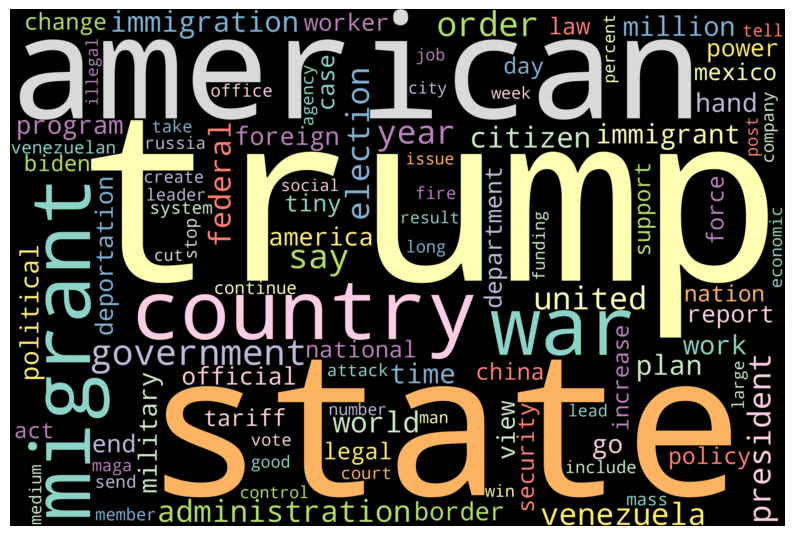

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Se pinta el Wordcloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1,
                      max_words=100, background_color='black',
                      colormap='Set3', collocations=False,
                      stopwords=STOPWORDS).generate(' '.join(df_analisis['lemmas']))
plot_cloud(wordcloud)
